### Bisection Method

The **Bisection Method** is a numerical technique used to find the root of a nonlinear equation of the form 
$$
f(x) = 0
$$
It begins with an interval \([a, b]\) such that
$$
f(a).f(b) < 0
$$
which guarantees the existence of at least one root in the interval.

The method repeatedly halves the interval by computing the midpoint  
$$
c = \frac{a + b}{2}
$$
and selecting the subinterval in which the sign of the function changes.

This process continues until the interval becomes sufficiently small or the function value at the midpoint is close to zero.

The bisection method is **simple**, **stable**, and **guaranteed to converge**, but it converges **slowly** compared to other methods.



In [56]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [57]:
def f(x):
    return x**3 - x - 2


In [71]:
def bisection_table(f, a, b, tol=1e-6, max_iter=100):
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) and f(b) must have opposite signs")

    print(f"{'n':>2} {'a':>10} {'b':>10} {'c':>10} {'f(c)':>12} {'error':>12}")
    print("-" * 60)

    for n in range(1, max_iter + 1):
        c = (a + b) / 2
        error = abs(b - a) / 2

        print(f"{n:2d} {a:10.6f} {b:10.6f} {c:10.6f} {f(c):12.6e} {error:12.6e}")

        if abs(f(c)) < tol or error < tol:
            print(f"\nConverged in {n} iterations")
            return c

        if f(a) * f(c) < 0:
            b = c
        else:
            a = c

    raise RuntimeError("Maximum iterations reached")


In [72]:
root = bisection_table(f, 1, 2)
print("Root =", root)


 n          a          b          c         f(c)        error
------------------------------------------------------------
 1   1.000000   2.000000   1.500000 -1.250000e-01 5.000000e-01
 2   1.500000   2.000000   1.750000 1.609375e+00 2.500000e-01
 3   1.500000   1.750000   1.625000 6.660156e-01 1.250000e-01
 4   1.500000   1.625000   1.562500 2.521973e-01 6.250000e-02
 5   1.500000   1.562500   1.531250 5.911255e-02 3.125000e-02
 6   1.500000   1.531250   1.515625 -3.405380e-02 1.562500e-02
 7   1.515625   1.531250   1.523438 1.225042e-02 7.812500e-03
 8   1.515625   1.523438   1.519531 -1.097125e-02 3.906250e-03
 9   1.519531   1.523438   1.521484 6.221756e-04 1.953125e-03
10   1.519531   1.521484   1.520508 -5.178886e-03 9.765625e-04
11   1.520508   1.521484   1.520996 -2.279443e-03 4.882812e-04
12   1.520996   1.521484   1.521240 -8.289059e-04 2.441406e-04
13   1.521240   1.521484   1.521362 -1.034331e-04 1.220703e-04
14   1.521362   1.521484   1.521423 2.593543e-04 6.103516e-05
15

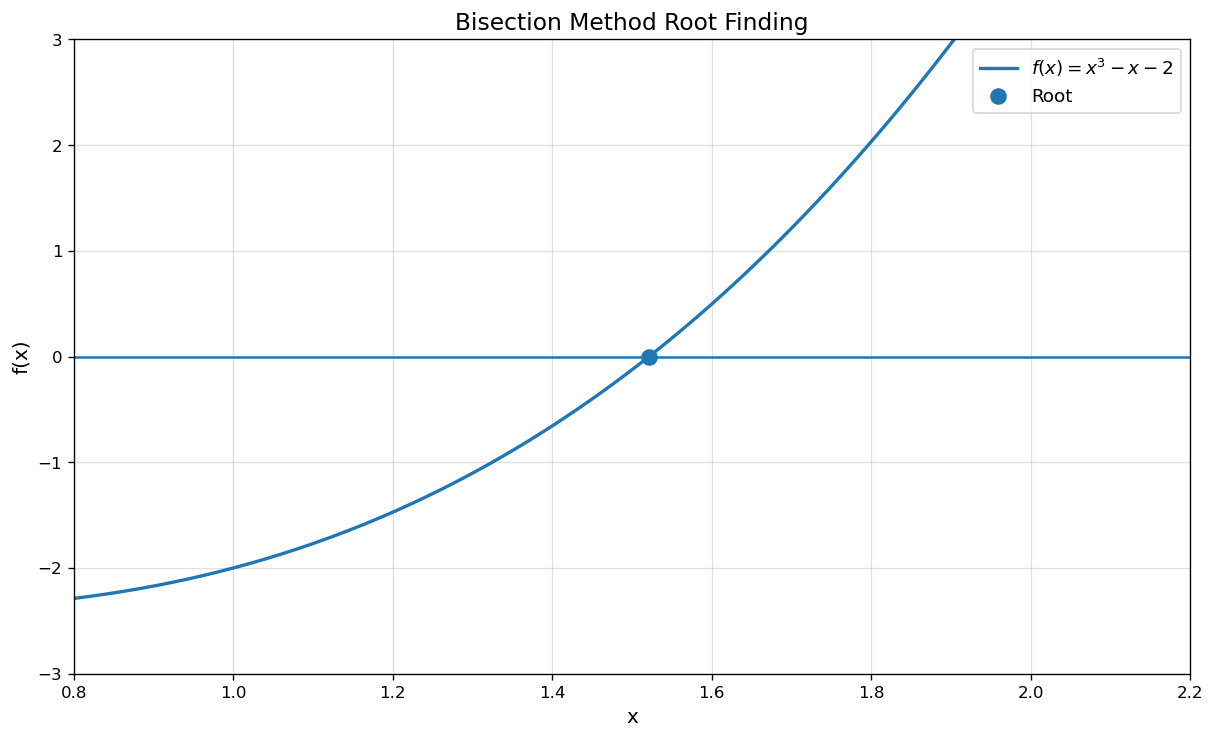

In [73]:
x = np.linspace(0, 2.5, 500)
y = f(x)

plt.figure(figsize=(12, 7), dpi=120)

# Axes lines (Desmos-style)
plt.axhline(0)
plt.axvline(0)

# Function
plt.plot(x, y, linewidth=2, label=r"$f(x)=x^3-x-2$")

# Root marker
plt.scatter(root, f(root), s=80, zorder=5, label="Root")

# Zoom near root
plt.xlim(0.8, 2.2)
plt.ylim(-3, 3)

# Grid like Desmos
plt.grid(True, alpha=0.4)

# Labels
plt.xlabel("x", fontsize=12)
plt.ylabel("f(x)", fontsize=12)
plt.title("Bisection Method Root Finding", fontsize=14)

plt.legend(fontsize=11)
plt.show()